<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Project%232_RF%20(standalone)%20and%20LSTM%20base%20on%20WSN-DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("dataset_WSN-DS.csv")
dataset.shape
dataset.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Class               0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [4]:
dataset["Class"].unique()

array([0, 4, 3, 1, 2])

In [5]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


### **Data Preprocessing**

In [7]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.0100000e+05 5.0000000e+01 1.0000000e+00 ... 1.3008535e+02
  0.0000000e+00 2.4694000e+00]
 [1.0100100e+05 5.0000000e+01 0.0000000e+00 ... 0.0000000e+00
  4.0000000e+00 6.9570000e-02]
 [1.0100200e+05 5.0000000e+01 0.0000000e+00 ... 0.0000000e+00
  3.0000000e+00 6.8980000e-02]
 ...
 [2.0109800e+05 1.0030000e+03 0.0000000e+00 ... 1.3926438e+02
  1.0000000e+00 9.4370000e-02]
 [2.0109900e+05 1.0030000e+03 0.0000000e+00 ... 1.5827492e+02
  3.0000000e+00 1.6047000e-01]
 [2.0204100e+05 1.0250000e+03 0.0000000e+00 ... 1.1500407e+02
  0.0000000e+00 1.0132500e+00]]
[0 0 0 ... 0 0 0]


In [8]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 340066, 1: 14596, 2: 10049, 3: 6638, 4: 3312})


In [9]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 340066, 4: 340066, 3: 340066, 1: 340066, 2: 340066})


In [11]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### **Random Forest (RF) for 5 class classifications**

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
y_test_prediction = rf.predict(X_test)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='PuBuGn')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  ax.yaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Random Forest


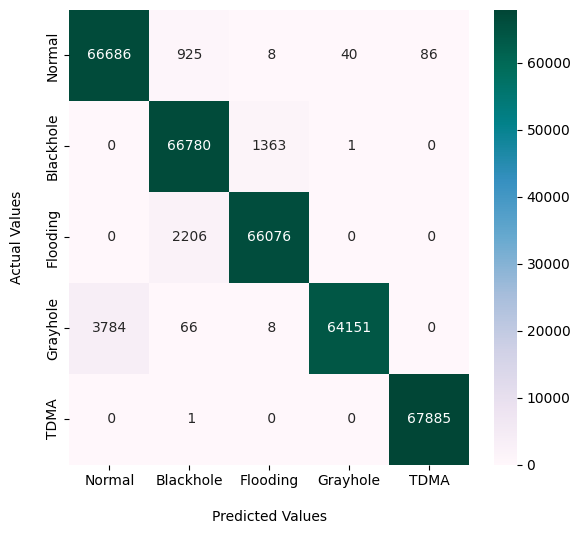

In [14]:
print("Confusion Matrix of Random Forest") 
conf_mat(y_test, y_test_prediction)

In [15]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2,sample_weight=None)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2, average='weighted', sample_weight=None)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2,average='weighted',sample_weight=None)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2, average='weighted', sample_weight=None))
  print("F1-Score :",f1)

In [16]:
performance("Random Forest",y_test, y_test_prediction)

Model Name is : Random Forest
Accuracy : 97.50401392670834
Precision : 97.56603136420294
Recall : 97.50401392670834
F1-Score : 0.9750720378951224


In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[66686   925     8    40    86]
 [    0 66780  1363     1     0]
 [    0  2206 66076     0     0]
 [ 3784    66     8 64151     0]
 [    0     1     0     0 67885]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     67745
           1       0.95      0.98      0.97     68144
           2       0.98      0.97      0.97     68282
           3       1.00      0.94      0.97     68009
           4       1.00      1.00      1.00     67886

    accuracy                           0.98    340066
   macro avg       0.98      0.98      0.98    340066
weighted avg       0.98      0.98      0.98    340066



### **LSTM for 5 classes classification**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_WSN-DS.csv")

In [3]:
# Preprocessing
le = LabelEncoder()
dataset['Class'] = le.fit_transform(dataset['Class'])
num_classes = len(le.classes_)
X = dataset.drop('Class', axis=1).values
y = to_categorical(dataset['Class'].values, num_classes=num_classes)

In [4]:
# Encode class labels
le = LabelEncoder()
dataset['Class'] = le.fit_transform(dataset['Class'])
num_classes = len(le.classes_)

# change num_classes to 5
num_classes = 5

# Split dataset into features and target
X = dataset.drop('Class', axis=1).values
y = to_categorical(dataset['Class'].values, num_classes=num_classes)

In [5]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [6]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [7]:
# Reshape input data for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [8]:
# Define LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

# Decode class labels
predicted_classes = le.inverse_transform(predicted_classes)

# Confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test.argmax(axis=1), predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/15
42509/42509 [==============================] - 226s 5ms/step - loss: 1.6096 - accuracy: 0.1998 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 2/15
42509/42509 [==============================] - 214s 5ms/step - loss: 1.6095 - accuracy: 0.1992 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 3/15
42509/42509 [==============================] - 211s 5ms/step - loss: 1.6095 - accuracy: 0.2001 - val_loss: 1.6095 - val_accuracy: 0.2004
Epoch 4/15
42509/42509 [==============================] - 208s 5ms/step - loss: 1.6095 - accuracy: 0.2002 - val_loss: 1.6095 - val_accuracy: 0.2008
Epoch 5/15
42509/42509 [==============================] - 208s 5ms/step - loss: 1.6095 - accuracy: 0.2001 - val_loss: 1.6095 - val_accuracy: 0.1992
Epoch 6/15
42509/42509 [==============================] - 208s 5ms/step - loss: 1.6095 - accuracy: 0.1998 - val_loss: 1.6095 - val_accuracy: 0.2004
Epoch 7/15
42509/42509 [==============================] - 208s 5ms/step - loss: 1.6095 - accuracy: 0.1992 - val_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     67745
           1       0.00      0.00      0.00     68144
           2       0.00      0.00      0.00     68282
           3       0.00      0.00      0.00     68009
           4       0.20      1.00      0.33     67886

    accuracy                           0.20    340066
   macro avg       0.04      0.20      0.07    340066
weighted avg       0.04      0.20      0.07    340066



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
